## Import libraries

In [1]:
from data_loader import DataLoader
from bayesian_generalized_regression import BayesianGeneralizedRegression
import matplotlib.pyplot as plt
%matplotlib notebook

## Load data

In [2]:
dataset_root_directory = './regression-dataset'
full_dataset = DataLoader.load_full_dataset(dataset_root_directory)
print('%d subsets of %d training examples with true values' % (len(full_dataset), len(full_dataset[0][0])))
print('Total %d training examples and true values' % (len(full_dataset)*len(full_dataset[0][0])))

10 subsets of 20 training examples with true values
Total 200 training examples and true values


## Initialize parameters

In [3]:
input_vector_size = 2

## Train models with different hyperparameters

In [4]:
basis_function_degrees = [d for d in range(1, 5)]
MSE_errors = []
running_times = []

for degree in basis_function_degrees:
    model = BayesianGeneralizedRegression(input_vector_degree=input_vector_size, feature_vector_degree=degree)
    print('Training in progress for basis function degree =', degree)
    model.learn(full_dataset, report_error=True)
    running_times.append(model.training_time)
    MSE_errors.append(model.mse_error)
    print()

Training in progress for basis function degree = 1
Mean Square Error = 1.292 
Training time = 0.28 seconds

Training in progress for basis function degree = 2
Mean Square Error = 0.934 
Training time = 0.32 seconds

Training in progress for basis function degree = 3
Mean Square Error = 0.065 
Training time = 0.39 seconds

Training in progress for basis function degree = 4
Mean Square Error = 0.060 
Training time = 0.54 seconds



## Plot Mean Square Error vs Basis function degree

<IPython.core.display.Javascript object>


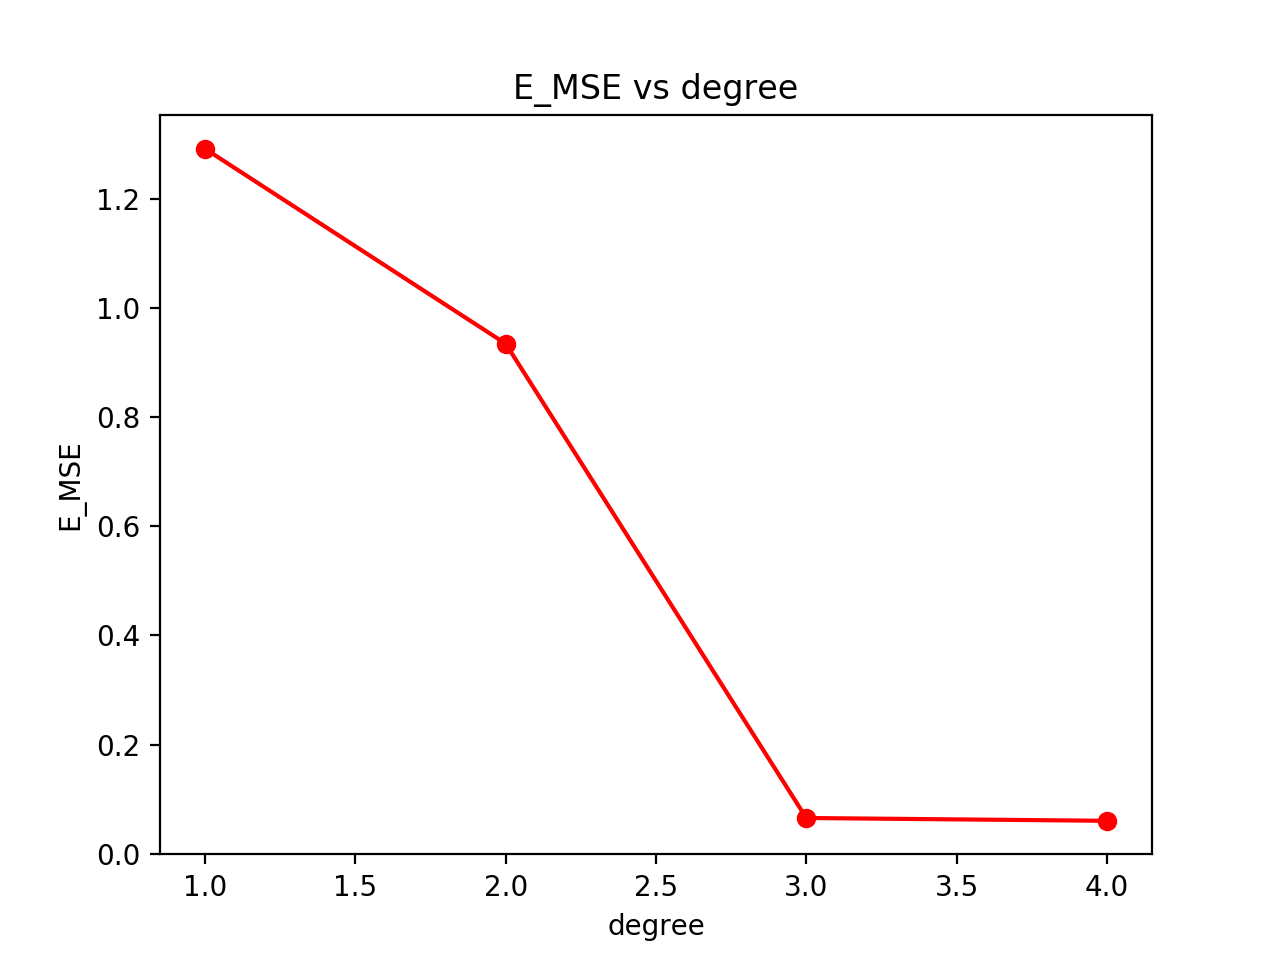

In [5]:
plt.plot(basis_function_degrees,MSE_errors, '-o', c='r')
plt.xlabel('degree')
plt.ylabel('E_MSE')
plt.title('E_MSE vs degree')
plt.show()

## Plot Running time vs Basis function degree

<IPython.core.display.Javascript object>


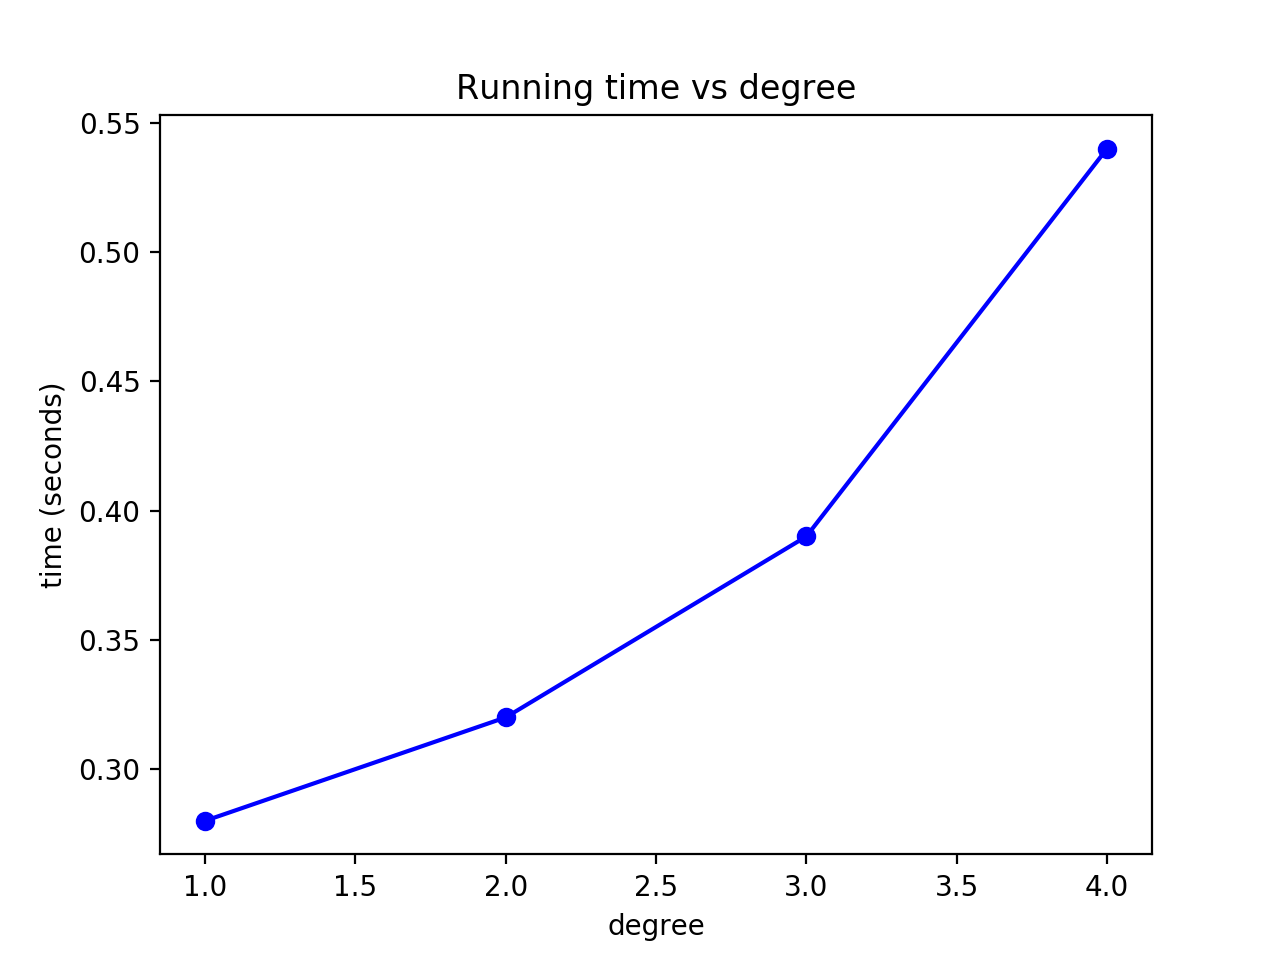

In [6]:
plt.plot(basis_function_degrees,running_times, '-o', c='b')
plt.xlabel('degree')
plt.ylabel('time (seconds)')
plt.title('Running time vs degree')
plt.show()